<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_facetgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [2]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###facetgrid

###facetgrid 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)


####tips

In [3]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [4]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


####그래프 확인

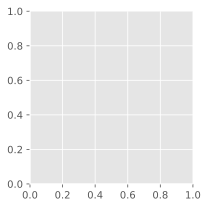

In [7]:
sns.FacetGrid(tips)

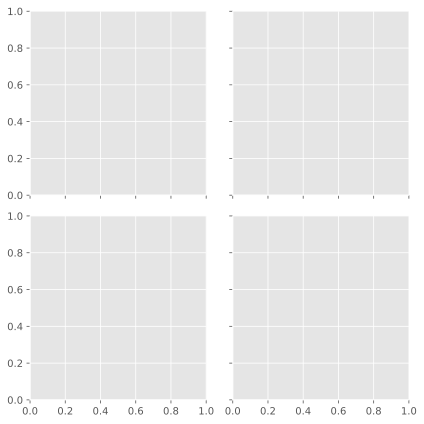

In [8]:
#col = 2개  sex = 2개
sns.FacetGrid(data=tips, col='time', row='sex')

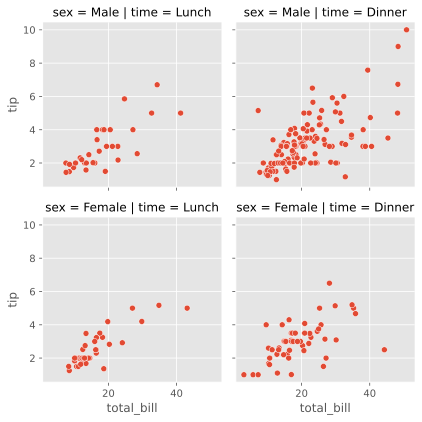

In [11]:
#map 함수 사용
g = sns.FacetGrid(data=tips, col='time', row='sex')
g.map(sns.scatterplot,'total_bill','tip')

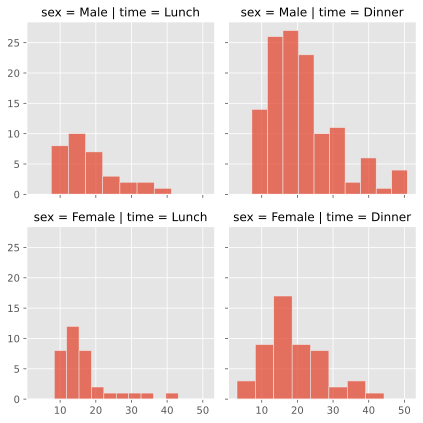

In [12]:
#map.dataframe() 함수 사용

g = sns.FacetGrid(tips, col='time', row='sex')
g.map_dataframe(sns.histplot, x='total_bill')

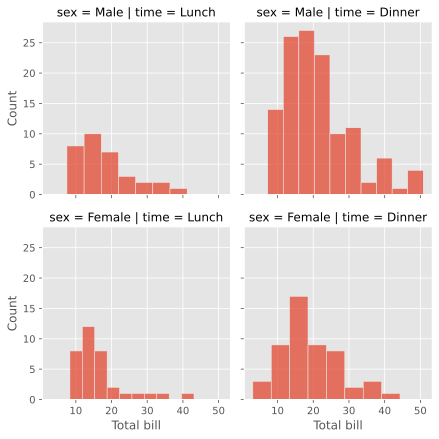

In [13]:
#map_dataframe() 함수 사용시에 축 레이브를 ㅈ추가하느 방법
g = sns.FacetGrid(data=tips, col='time', row='sex')
g.map_dataframe(sns.histplot, x='total_bill')
g.set_axis_labels("Total bill", "Count")

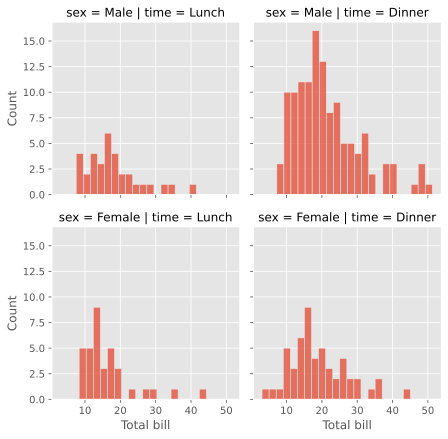

In [14]:
#sns.histplot 매개변수 적용시 binwidth=2 옵션 사용
g = sns.FacetGrid(data=tips, col='time', row='sex')
g.map_dataframe(sns.histplot, x='total_bill', binwidth=2)
g.set_axis_labels("Total bill", "Count")

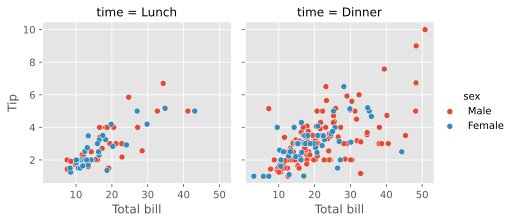

In [15]:
#FaceGrid() 함수에 hue 옵션 사용
g = sns.FacetGrid(data=tips, col='time', hue='sex')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels("Total bill", 'Tip')
g.add_legend()

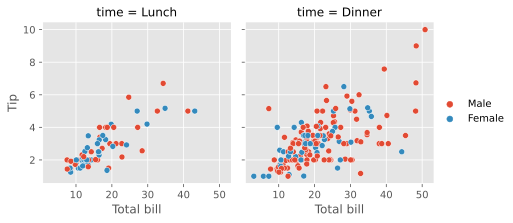

In [17]:
#map_dataframe()함수 안에 hue 옵션 사용
g = sns.FacetGrid(data=tips, col='time')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', hue='sex')
g.set_axis_labels("Total bill", "Tip")
g.add_legend()

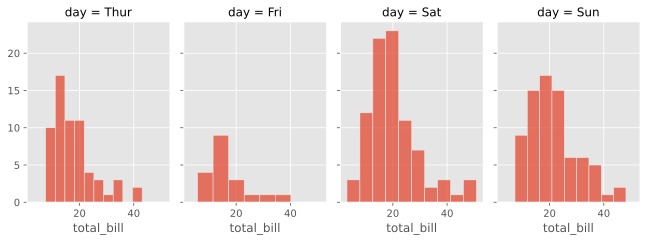

In [18]:
#FacetGrid() 함수에 height, aspect 옵션 사용
g = sns.FacetGrid(data=tips, col='day', height=3.5, aspect=.65)
g.map(sns.histplot, "total_bill")

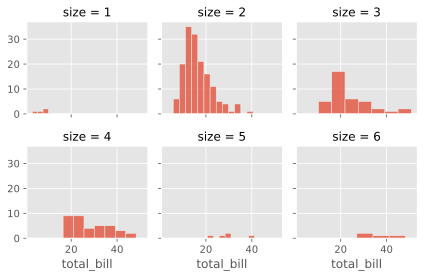

In [19]:
#FacetGrid() 함수에 col_wrap 옵션 사용
g = sns.FacetGrid(data=tips, col='size', height=2, col_wrap=3)
g.map(sns.histplot, "total_bill")

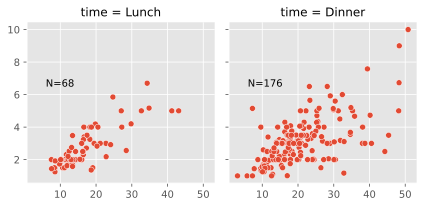

In [20]:
#map_dataframe() 함수에 사용자 지정 함수 전달

def annotate(data, **kws):
  n = len(data)
  ax=plt.gca()
  ax.text(.1, .6, f"N={n}", transform=ax.transAxes)

g = sns.FacetGrid(data=tips, col='time')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels("Total bill", "Tip")
g.map_dataframe(annotate)

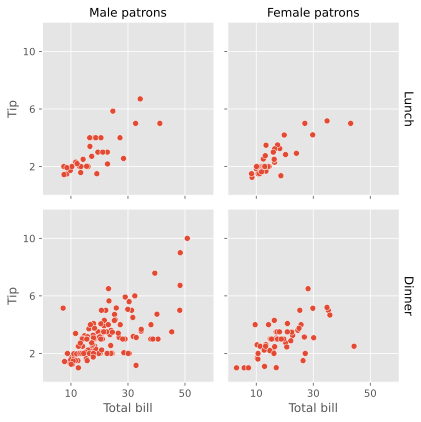

In [26]:
#다른 여러 유용한 매개변수 사용
g = sns.FacetGrid(data=tips, col='sex', row='time', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels("Total bill", "Tip")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0,60), ylim=(0,12),xticks=[10,30,50], yticks=[2,6,10])
g.tight_layout()
#g.savefig('facet_plot.png')

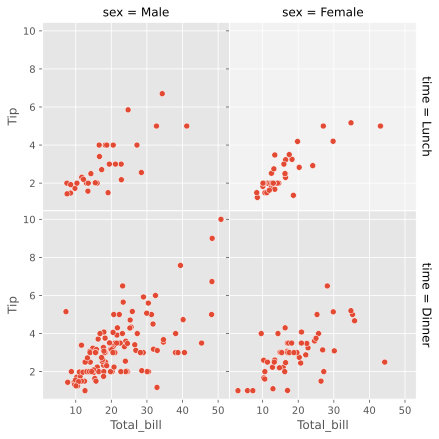

In [35]:
g = sns.FacetGrid(data=tips, col='sex', row='time', margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.set_axis_labels("Total_bill", "Tip")
g.fig.subplots_adjust(wspace=0, hspace=0)
for (row_val, col_val), ax in g.axes_dict.items():
  if row_val == "Lunch" and col_val =="Female":
    ax.set_facecolor(".95")
  else:
    ax.set_facecolor(".90")